# Бустрап

In [1]:
# Импорт библиотек
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#  1. Деньги моего отца

Мой отец завёл себе копилку и собирает десятирублёвые монеты. Мне стало интересно как именно распределён возраст этих монет.
Я сделал из копилки случайную выборку из сотни десятирублёвых монет и записал дату с каждой в файл `money.csv`.

In [2]:
x = pd.read_csv('data/money.csv').fielddate.values
x

array([2011, 2017, 2016, 2012, 2017, 2015, 2011, 2015, 2017, 2012, 2019,
       2019, 2012, 2018, 2018, 2018, 2018, 2017, 2018, 2012, 2010, 2012,
       2012, 2011, 2011, 2012, 2011, 2017, 2017, 2016, 2012, 2012, 2017,
       2017, 2012, 2010, 2018, 2016, 2011, 2017, 2012, 2017, 2013, 2017,
       2010, 2011, 2018, 2015, 2011, 2018, 2012, 2013, 2009, 2017, 2017,
       2018, 2019, 2018, 2011, 2013, 2011, 2013, 2017, 2018, 2011, 2012,
       2018, 2012, 2019, 2018, 2011, 2017, 2019, 2019, 2019, 2012, 2011,
       2013, 2011, 2017, 2013, 2013, 2017, 2017, 2017, 2011, 2019, 2013,
       2017, 2012, 2009, 2010, 2010, 2020, 2019, 2020, 2020, 2019, 2018,
       2020], dtype=int64)

In [3]:
x.size

100

Посмотрим как распределён возраст. 

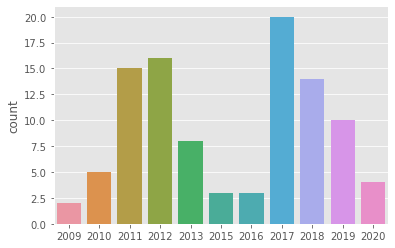

In [4]:
sns.countplot(x);

Распределение оказывается нестандартным. Видно, что у него есть две моды. Посмотрим на средний возраст монет.

In [5]:
x.mean()

2014.84

In [6]:
np.median(x)

2016.0

Интересно было бы построить для этого среднего доверительный интервал. Сделаем это с помощью бустрапа.

Напишем функцию для бустрапирования.

In [7]:
def get_bootstrap_sample(x, B_sample=1):
    N = x.size 
    sample = np.random.choice(x, size=(N, B_sample), replace=True)
    
    if B_sample == 1:
        sample = sample.T[0]
    return sample
    
x_boot = get_bootstrap_sample(x)
x_boot

array([2010, 2011, 2017, 2011, 2012, 2017, 2012, 2012, 2012, 2011, 2012,
       2016, 2011, 2015, 2018, 2013, 2017, 2017, 2013, 2017, 2012, 2013,
       2013, 2013, 2016, 2012, 2011, 2013, 2017, 2020, 2016, 2017, 2018,
       2012, 2017, 2020, 2015, 2013, 2013, 2018, 2017, 2018, 2019, 2017,
       2018, 2012, 2015, 2011, 2011, 2012, 2018, 2012, 2013, 2019, 2012,
       2017, 2016, 2013, 2013, 2009, 2017, 2017, 2017, 2018, 2017, 2012,
       2018, 2011, 2017, 2018, 2018, 2017, 2012, 2018, 2018, 2011, 2017,
       2018, 2017, 2012, 2011, 2010, 2016, 2012, 2011, 2011, 2018, 2016,
       2012, 2017, 2018, 2020, 2019, 2019, 2018, 2012, 2017, 2011, 2011,
       2012], dtype=int64)

Давайте сравним распределение выборки, которую мы сэмплировали с исходной.

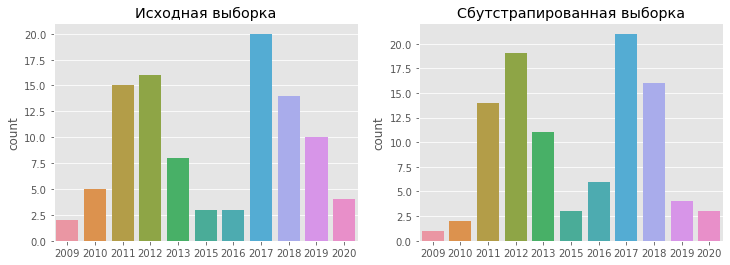

In [8]:
_, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.countplot(x, ax=axes[0])
sns.countplot(x_boot, ax=axes[1])
axes[0].set_title("Исходная выборка")
axes[1].set_title("Сбутстрапированная выборка");

Сгенерируем выборку из средних.

In [9]:
x_boot = get_bootstrap_sample(x, B_sample=10**6)
x_boot.shape

(100, 1000000)

In [10]:
x_boot_m = np.mean(x_boot, axis=0)
x_boot_m

array([2014.92, 2014.76, 2014.94, ..., 2015.48, 2015.11, 2014.97])

In [11]:
x_boot_m.size

1000000

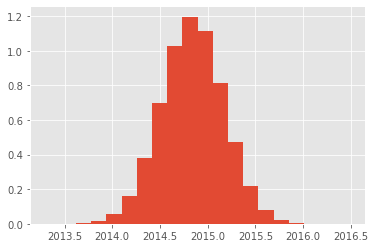

In [12]:
plt.hist(x_boot_m, bins=20, density=True);

Сравним получившееся распределение с нормальным. Они оказываются похожи. Это связано с тем, что мы бустрапируем среднее, в возрасте монет нет выбросов, поэтому тут хорошо работает ЦПТ. 

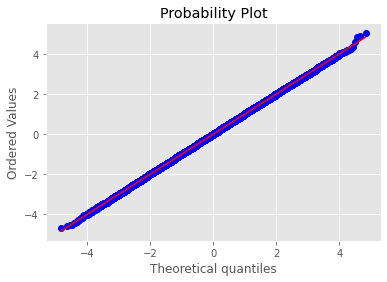

In [13]:
x_scale = (x_boot_m - x_boot_m.mean())/x_boot_m.std()
stats.probplot(x_scale, dist="norm", plot=plt);

Построим доверительный интервал для среднего. __Делай раз:__ доверительный интервал Эфрона.

In [14]:
alpha = 0.05

left = np.quantile(x_boot_m, alpha/2)
right = np.quantile(x_boot_m, 1-alpha/2)
left, right

(2014.2, 2015.48)

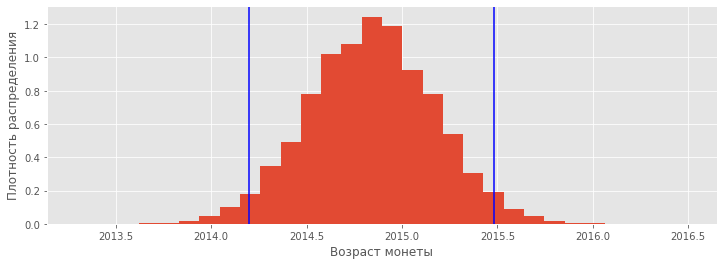

In [15]:
fig = plt.figure(figsize=(12,4))
plt.hist(x_boot_m, bins=30, density=True)
plt.axvline(left, color='b')
plt.axvline(right, color='b');

plt.xlabel('Возраст монеты')
plt.ylabel('Плотность распределения');

__Делай два:__ доверительный интервал Холла

In [16]:
alpha = 0.05

theta_hat = np.mean(x)
x_boot_h = np.mean(x_boot - theta_hat, axis=0)

left = theta_hat - np.quantile(x_boot_h, 1-alpha/2)
right = theta_hat - np.quantile(x_boot_h, alpha/2)
left, right

(2014.1999999999998, 2015.4799999999998)

__Делай три:__ t-процентильный доверительный интервал

In [17]:
theta_hat = np.mean(x)
std_hat = np.std(x)

x_boot_t = np.mean(x_boot - theta_hat, axis=0)
x_boot_t = x_boot_t/np.std(x_boot, axis=0)

left = theta_hat - np.quantile(x_boot_t, 1-alpha/2)*std_hat
right = theta_hat - np.quantile(x_boot_t, alpha/2)*std_hat
left, right

(2014.1804763976522, 2015.4896491023796)

Последний доверительный интервал получился пошире. [Теория показывает,](http://quantile.ru/03/03-SA.pdf) что последний способ даёт более низкую ошибку в плане асимптотики. 

# 2. Цитаты и репосты

> Помните, что для человека звук его имени является самым сладким и самым важным звуком человеческой речи. (Дейл Карнеги)

Доверяй, но проверяй. Решим задачку по психологии! Все цитаты в пабликах вконтакте делятся на два вида: мудрые и недостаточно мудрые. Если цитата мудрая, то её не грех репостнуть на стеночку. Поговаривают, что если в цитате есть личные местоимения, то пользователь автоматически сопоставляет себя автору этой цитаты и вероятность того, что она получит лайк повышается. Например, цитату 

> Можно простить человеку все, кроме отсутствия. (Экзюпери) 

мне не очень хотелось бы лайкать. А вот цитата 

> Мне наплевать, что вы обо мне думаете. Я о вас вообще не думаю. (Булгаков) 

совершенно другое дело. 

В табличке `df_vk_wise` лежат даныне о мудрых цитатах из [мудрого паблика.](https://vk.com/ooioioioioioo) В колонке `I` находится переменная, которая принимает значение `True`, когда в тексте цитаты было личное местоимение "Я".

Срежем первые $50$ постов, так как под ними количество репостов и лайков ещё окончательно не выставлено и будем работать с остатками. 

In [18]:
df = pd.read_csv('data/df_vk_wise.csv')
df.head()

,likes,reposts,text,I
0,7,0,Кому удобнее следить за новостями М. в инстагр...,False
1,575,25,"Если девушка невероятно хороша в юности, но ра...",False
2,509,57,"То была очень обычная узость мышления - те, кт...",False
3,542,15,"Когда он знакомил меня с Сергеем, тот спросил:...",False
4,949,59,"- Общепризнано, сэр, что физические упражнения...",False


Построим гистограмму для числа репостов постов, содержащих личные местоимения и не содержащих.

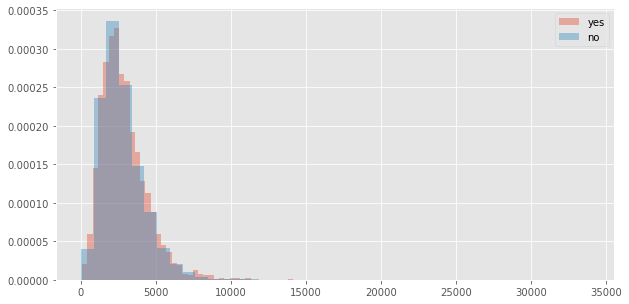

In [19]:
x = df[df['I']== True]['likes'].values
y = df[df['I']== False]['likes'].values

plt.figure(figsize=(10,5))
plt.hist(x, bins=40, density=True, alpha=0.4, label='yes')
plt.hist(y, bins=40, density=True, alpha=0.4, label='no')
plt.legend();

In [20]:
np.median(x), np.median(y)

(2580.5, 2490.0)

Хвосты на гистограммах оказываются очень длинными. У нас есть выбросы. Смотреть на средние, чтобы сравнить между собой разные цитаты, будет некорректно. Будем смотреть на медианы. Построим доверительный интервал для разности медиан.

In [21]:
x_boot = get_bootstrap_sample(x, B_sample=10**4)
x_boot = np.median(x_boot, axis=0)

y_boot = get_bootstrap_sample(y, B_sample=10**4)
y_boot = np.median(y_boot, axis=0)

In [22]:
def stat_intervals(boot, alpha=0.05):
    left = np.quantile(boot, alpha/2)
    right = np.quantile(boot, 1-alpha/2)
    return left, right

In [23]:
stat_intervals(x_boot)

(2518.0, 2656.0)

In [24]:
stat_intervals(y_boot)

(2457.0, 2526.0)

Доверительные интервалы пересекаются. Но делать вывод лучше по доверительному интервалу для разности. Такая процедура будет мощнее. 

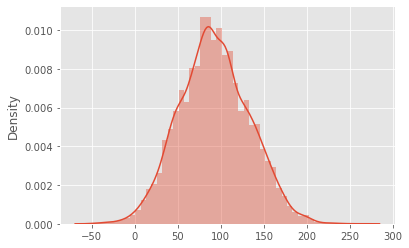

In [25]:
sns.distplot(x_boot - y_boot);

In [26]:
stat_intervals(x_boot - y_boot)


(15.987500000000011, 171.5)

Ноль не попадает в доверительный интервал, значит на уровне значимость $5\%$ разница есть. На последок посмотрим на вероятность того, что разность больше нуля.

In [27]:
np.mean(x_boot - y_boot > 0)

0.9917

## Материалы:

* [Статья про бустрэп от Станислава Анатольева](http://quantile.ru/03/03-SA.pdf)
* [Неплохая статья про бутстрап в R, на основе которой делалась тетрадка](https://moderndive.com/8-confidence-intervals.html)

<center>
<img src="https://raw.githubusercontent.com/FUlyankin/r_probability/master/end_seminars_2020/sem08/real_expect.png" height="300" width="700"> 
</center>